In [637]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px 
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import datasets
from sklearn import linear_model
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from xgboost import XGBRegressor
from sklearn.pipeline import make_pipeline
from matplotlib import style

In [638]:
ccm_analytics= pd.read_csv('CCM_Analytics.csv')
ccm_analytics.head()

,DateOfGame,Opponent,TotalPoint,FirstHalfPoint,FirstHalfFieldGoalAttempts,FirstHalfFieldGoalsMade,SecondHalfPoint,SecondHalfFieldGoalAttempts,SecondHalfFieldGoalsMade,FreeThrowsAttemptedFirstHalf,...,PointsPerAttemptGuardedTotal,2PointFieldGoal-PointsPerAttemptTotal,3PointFieldGoals-PointsPerAttemptTotal,2PointFieldGoalOpen-PointsPerAttemptsTotal,2PointFieldGoalGuarded-PointsPerAttemptTotal,3PointFieldGoalOpen-PointPerAttemptTotal,3PointFieldGoalGuarded-PointPerAttemptTotal,Assists,KaukaunaPointsScored,WinOrLoss
0,1/19/2021,GB SouthWest,26,11,6,3,15,9,6,2,...,1.166667,1.666667,1.333333,2,1.600000,3,0.857143,6,93,Win
1,1/22/2021,Hortonville,8,7,6,0,1,6,2,2,...,0.222222,0.400000,0.428571,0,0.500000,1.5,0.000000,7,96,Win
2,1/23/2021,Appleton West,25,15,12,5,10,6,3,0,...,1.000000,0.500000,1.615385,#DIV/0!,0.500000,1.714285714,1.285714,11,99,Win
3,12/8/2020,Appleton East,40,10,10,4,30,12,8,2,...,1.210526,1.294118,0.600000,2,1.250000,0,1.000000,6,86,Win
4,1/29/2021,Kimberly,20,10,8,3,10,11,4,2,...,0.666667,0.800000,1.000000,0,0.888889,1.5,0.000000,7,65,Loss


In [639]:
# Check to see if any columns do not have a value 
ccm_analytics.isna().sum()

DateOfGame                                      0
Opponent                                        0
TotalPoint                                      0
FirstHalfPoint                                  0
FirstHalfFieldGoalAttempts                      0
FirstHalfFieldGoalsMade                         0
SecondHalfPoint                                 0
SecondHalfFieldGoalAttempts                     0
SecondHalfFieldGoalsMade                        0
FreeThrowsAttemptedFirstHalf                    0
FreeThrowsMadeFirstHalf                         0
FreeThrowsAttemptedSecondHalf                   0
FreeThrowsMadeSecondHalf                        0
FreeThrowsAttemptedTotal                        0
FreeThrowsMadeTotal                             0
FieldGoalsAttemptedTotal                        0
FieldGoalsMadeTotal                             0
2PointFieldGoalsAttemptedTotal                  0
2PointFieldGoalsMadeTotal                       0
3PointFieldGoalsAttemptedTotal                  0


In [640]:
# Checking to see if any are null
ccm_analytics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 47 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   DateOfGame                                    9 non-null      object 
 1   Opponent                                      9 non-null      object 
 2   TotalPoint                                    9 non-null      int64  
 3   FirstHalfPoint                                9 non-null      int64  
 4   FirstHalfFieldGoalAttempts                    9 non-null      int64  
 5   FirstHalfFieldGoalsMade                       9 non-null      int64  
 6   SecondHalfPoint                               9 non-null      int64  
 7   SecondHalfFieldGoalAttempts                   9 non-null      int64  
 8   SecondHalfFieldGoalsMade                      9 non-null      int64  
 9   FreeThrowsAttemptedFirstHalf                  9 non-null      int64  

In [641]:
#Replace #DIV/0! error with 0 (Cleaning data)
ccm_analytics = ccm_analytics.replace('#DIV/0!', 0)

In [642]:
# Get the names of all the columns
ccm_analytics.describe().columns

Index(['TotalPoint', 'FirstHalfPoint', 'FirstHalfFieldGoalAttempts',
       'FirstHalfFieldGoalsMade', 'SecondHalfPoint',
       'SecondHalfFieldGoalAttempts', 'SecondHalfFieldGoalsMade',
       'FreeThrowsAttemptedFirstHalf', 'FreeThrowsMadeFirstHalf',
       'FreeThrowsAttemptedSecondHalf', 'FreeThrowsMadeSecondHalf',
       'FreeThrowsAttemptedTotal', 'FreeThrowsMadeTotal',
       'FieldGoalsAttemptedTotal', 'FieldGoalsMadeTotal',
       '2PointFieldGoalsAttemptedTotal', '2PointFieldGoalsMadeTotal',
       '3PointFieldGoalsAttemptedTotal', '3PointFieldGoalsMadeTotal',
       'FieldGoalsAttemptedOpenTotal', 'FieldGoalsMadeOpenTotal',
       'FieldGoalsAttemptedGuardedTotal', 'FieldGoalsMadeGuardedTotal',
       '2PointFieldGoalsAttemptedOpenTotal', '2PointFieldGoalsMadeOpenTotal',
       '2PointFieldGoalsAttemptedGuardedTotal',
       '2PointFieldGoalsMadeGuardedTotal ',
       '3PointFieldGoalsAttemptedOpenTotal', '3PointFieldGoalsMadeOpenTotal',
       '3PointFieldGoalsAttemptetGua

In [643]:
# Seperate Numerical and Categorical data
df_num = ccm_analytics.drop(columns = ['DateOfGame', 'Opponent', 'WinOrLoss'])
df_num

,TotalPoint,FirstHalfPoint,FirstHalfFieldGoalAttempts,FirstHalfFieldGoalsMade,SecondHalfPoint,SecondHalfFieldGoalAttempts,SecondHalfFieldGoalsMade,FreeThrowsAttemptedFirstHalf,FreeThrowsMadeFirstHalf,FreeThrowsAttemptedSecondHalf,...,PointsPerAttemptOpenTotal,PointsPerAttemptGuardedTotal,2PointFieldGoal-PointsPerAttemptTotal,3PointFieldGoals-PointsPerAttemptTotal,2PointFieldGoalOpen-PointsPerAttemptsTotal,2PointFieldGoalGuarded-PointsPerAttemptTotal,3PointFieldGoalOpen-PointPerAttemptTotal,3PointFieldGoalGuarded-PointPerAttemptTotal,Assists,KaukaunaPointsScored
0,26,11,6,3,15,9,6,2,2,2,...,2.666666667,1.166667,1.666667,1.333333,2,1.600000,3,0.857143,6,93
1,8,7,6,0,1,6,2,2,2,2,...,1,0.222222,0.400000,0.428571,0,0.500000,1.5,0.000000,7,96
2,25,15,12,5,10,6,3,0,0,3,...,1.714285714,1.000000,0.500000,1.615385,0,0.500000,1.714285714,1.285714,11,99
3,40,10,10,4,30,12,8,2,2,13,...,0.666666667,1.210526,1.294118,0.600000,2,1.250000,0,1.000000,6,86
4,20,10,8,3,10,11,4,2,2,1,...,1.285714286,0.666667,0.800000,1.000000,0,0.888889,1.5,0.000000,7,65
5,16,7,4,2,9,4,2,2,2,4,...,0,1.571429,1.000000,1.500000,0,1.000000,0,1.800000,7,57
6,27,12,6,3,15,8,6,5,4,2,...,0,1.571429,1.428571,1.714286,0,1.428571,0,1.714286,11,78
7,33,13,11,5,20,12,8,0,0,4,...,1.833333333,1.176471,1.076923,1.500000,2,1.166667,1.8,1.200000,9,92
8,12,0,5,0,12,6,4,0,0,3,...,2.5,0.555556,1.000000,0.857143,2,0.666667,3,0.500000,6,66


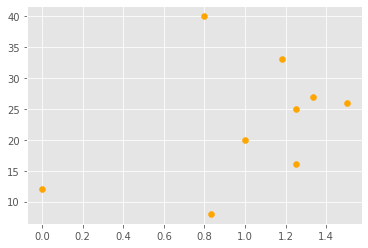

In [644]:
# Scatter Plots
plt.scatter(df_num.PointsPerAttemptFirstHalf.values, df_num.TotalPoint.values, marker ='o', color = 'orange')

<AxesSubplot:>

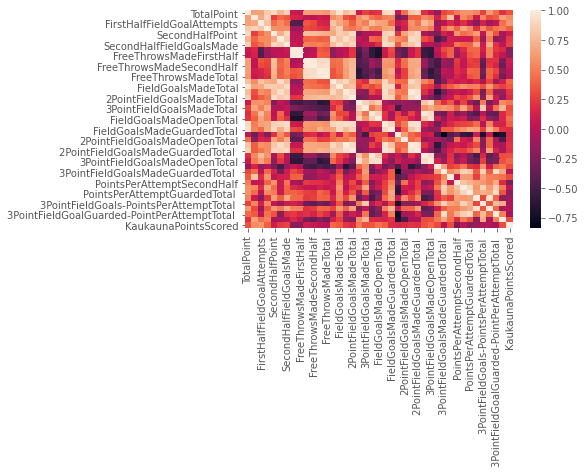

In [645]:
#Heat map correlations
shooting_correlation = df_num.corr()
sns.heatmap(shooting_correlation)

In [646]:
#Find correlations
shooting_correlation

,TotalPoint,FirstHalfPoint,FirstHalfFieldGoalAttempts,FirstHalfFieldGoalsMade,SecondHalfPoint,SecondHalfFieldGoalAttempts,SecondHalfFieldGoalsMade,FreeThrowsAttemptedFirstHalf,FreeThrowsMadeFirstHalf,FreeThrowsAttemptedSecondHalf,...,PointsPerAttemptFirstHalf,PointsPerAttemptSecondHalf,PointsPerAttemptTotal,PointsPerAttemptGuardedTotal,2PointFieldGoal-PointsPerAttemptTotal,3PointFieldGoals-PointsPerAttemptTotal,2PointFieldGoalGuarded-PointsPerAttemptTotal,3PointFieldGoalGuarded-PointPerAttemptTotal,Assists,KaukaunaPointsScored
TotalPoint,1.000000,0.637553,0.648497,0.837202,0.908141,0.744420,0.866735,7.799183e-02,0.055492,0.640942,...,0.374111,0.494035,0.590071,0.585688,0.539372,0.262553,0.619946,0.427163,0.210741,0.328528
FirstHalfPoint,0.637553,1.000000,0.691086,0.872669,0.256447,0.406591,0.352481,1.500480e-01,0.123368,0.030773,...,0.818480,0.052199,0.554056,0.435284,0.078980,0.539698,0.308133,0.368510,0.651800,0.567771
FirstHalfFieldGoalAttempts,0.648497,0.691086,1.000000,0.810865,0.438051,0.551934,0.436975,-4.278376e-01,-0.455882,0.344706,...,0.186180,0.045807,0.192227,0.013538,-0.223828,0.125426,-0.117600,0.040994,0.433223,0.598635
FirstHalfFieldGoalsMade,0.837202,0.872669,0.810865,1.000000,0.576124,0.558354,0.564474,-1.135924e-01,-0.145929,0.291202,...,0.597278,0.392210,0.670054,0.544339,0.209320,0.551285,0.353959,0.461371,0.511563,0.382733
SecondHalfPoint,0.908141,0.256447,0.438051,0.576124,1.000000,0.713001,0.895863,1.630820e-02,0.002579,0.787409,...,0.024575,0.591454,0.439216,0.498262,0.633781,0.036111,0.610340,0.335662,-0.089811,0.103629
SecondHalfFieldGoalAttempts,0.744420,0.406591,0.551934,0.558354,0.713001,1.000000,0.843813,1.787425e-02,0.028262,0.394068,...,0.116936,0.084026,0.081549,0.078185,0.380805,-0.128426,0.491855,-0.190543,-0.094296,0.239983
SecondHalfFieldGoalsMade,0.866735,0.352481,0.436975,0.564474,0.895863,0.843813,1.000000,7.905694e-02,0.044643,0.514528,...,0.127811,0.471661,0.400753,0.390397,0.679659,0.093968,0.705791,0.207218,0.014532,0.276644
FreeThrowsAttemptedFirstHalf,0.077992,0.150048,-0.427838,-0.113592,0.016308,0.017874,0.079057,1.000000e+00,0.988212,-0.058596,...,0.388295,-0.053081,0.179364,0.397770,0.418248,0.121026,0.522317,0.234046,0.167273,-0.184482
FreeThrowsMadeFirstHalf,0.055492,0.123368,-0.455882,-0.145929,0.002579,0.028262,0.044643,9.882118e-01,1.000000,-0.023162,...,0.393718,-0.128021,0.112227,0.357580,0.402989,0.034538,0.518068,0.166122,0.050862,-0.198512
FreeThrowsAttemptedSecondHalf,0.640942,0.030773,0.344706,0.291202,0.787409,0.394068,0.514528,-5.859587e-02,-0.023162,1.000000,...,-0.183484,0.239786,0.059087,0.262519,0.234752,-0.348657,0.206791,0.206463,-0.278965,0.096088


In [647]:
#Pivot table to see assits and point spread in first and second half
pd.pivot_table(ccm_analytics, index = 'TotalPoint', values = ['Assists', 'FirstHalfPoint', 'SecondHalfPoint'])

,Assists,FirstHalfPoint,SecondHalfPoint
TotalPoint,,,
8,7,7,1
12,6,0,12
16,7,7,9
20,7,10,10
25,11,15,10
26,6,11,15
27,11,12,15
33,9,13,20
40,6,10,30


In [648]:
# Going to machine learn to predict total points based on first half stats
y = ccm_analytics.TotalPoint
y


0    26
1     8
2    25
3    40
4    20
5    16
6    27
7    33
8    12
Name: TotalPoint, dtype: int64

In [649]:
# What to use from data to predict total points
ccm_features= ['FirstHalfPoint', 'FirstHalfFieldGoalAttempts', 'FreeThrowsAttemptedFirstHalf', 'PointsPerAttemptFirstHalf']


In [650]:
# Look at data to be used in prediction
X = ccm_analytics[ccm_features]
X.describe()

,FirstHalfPoint,FirstHalfFieldGoalAttempts,FreeThrowsAttemptedFirstHalf,PointsPerAttemptFirstHalf
count,9.000000,9.000000,9.000000,9.000000
mean,9.444444,7.555556,1.666667,1.016498
std,4.390647,2.833333,1.581139,0.445042
min,0.000000,4.000000,0.000000,0.000000
25%,7.000000,6.000000,0.000000,0.833333
50%,10.000000,6.000000,2.000000,1.181818
75%,12.000000,10.000000,2.000000,1.250000
max,15.000000,12.000000,5.000000,1.500000


In [651]:
# Look at first 5 values of prediction values
X.head()

,FirstHalfPoint,FirstHalfFieldGoalAttempts,FreeThrowsAttemptedFirstHalf,PointsPerAttemptFirstHalf
0,11,6,2,1.500000
1,7,6,2,0.833333
2,15,12,0,1.250000
3,10,10,2,0.800000
4,10,8,2,1.000000


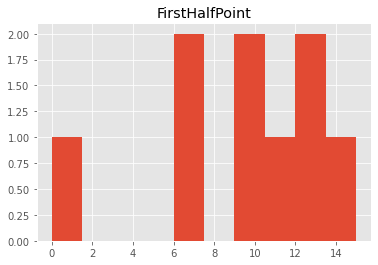

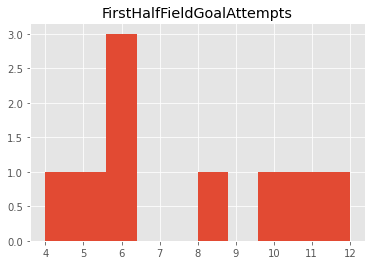

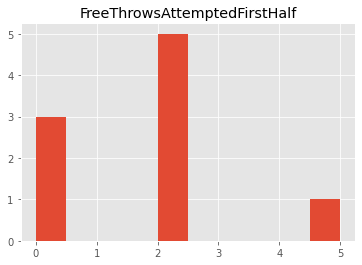

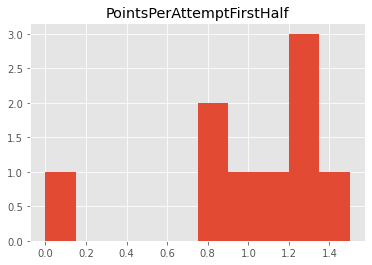

In [652]:
# See distributions for X values 
for i in X.columns:
    plt.hist(X[i])
    plt.title(i)
    plt.show()

In [690]:
# Used Decision Tree Regressor to split prediction values
from sklearn.tree import DecisionTreeRegressor
ccm_model = DecisionTreeRegressor(random_state = 1)
ccm_model.fit(X, y)

DecisionTreeRegressor(random_state=1)

In [691]:
print("Making predictions for the following 5 games:")
print(X.head())
print("The predicitions are")
print(ccm_model.predict(X.head()))
print("Actual values:", y.head().values)

Making predictions for the following 5 games:
   FirstHalfPoint  FirstHalfFieldGoalAttempts  FreeThrowsAttemptedFirstHalf  \
0              11                           6                             2   
1               7                           6                             2   
2              15                          12                             0   
3              10                          10                             2   
4              10                           8                             2   

   PointsPerAttemptFirstHalf  
0                   1.500000  
1                   0.833333  
2                   1.250000  
3                   0.800000  
4                   1.000000  
The predicitions are
[26.  8. 25. 40. 20.]
Actual values: [26  8 25 40 20]


In [692]:
# Model validation 
train_X, val_X, train_y, val_y = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 0)
print("train_X :", train_X)
print("train_y:", train_y.values)
print("val_X:", val_X)
print("val_y:", val_y.values)
ccm_model = DecisionTreeRegressor()
ccm_model.fit(train_X, train_y)
val_predictions = ccm_model.predict(val_X)
print("Predicition values:", val_predictions)
print("Mean absolute error: ", mean_absolute_error(val_y, val_predictions))

train_X :    FirstHalfPoint  FirstHalfFieldGoalAttempts  FreeThrowsAttemptedFirstHalf  \
1               7                           6                             2   
4              10                           8                             2   
8               0                           5                             0   
6              12                           6                             5   
3              10                          10                             2   
0              11                           6                             2   
5               7                           4                             2   

   PointsPerAttemptFirstHalf  
1                   0.833333  
4                   1.000000  
8                   0.000000  
6                   1.333333  
3                   0.800000  
0                   1.500000  
5                   1.250000  
train_y: [ 8 20 12 27 40 26 16]
val_X:    FirstHalfPoint  FirstHalfFieldGoalAttempts  FreeThrowsAttemptedFirs

In [694]:
# See if underfitting or overfitting and implement changes
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y) :
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state = 1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [695]:
# Setting different tree sizes
candidate_max_leaf_nodes = {5, 25, 50, 100, 250, 500}
scores = {leaf_size : get_mae(leaf_size, train_X, val_X, train_y, val_y) for leaf_size in candidate_max_leaf_nodes}

# Store the best value of max_leaf_nodes
best_tree_size = best_tree_size = min(scores, key = scores.get)

In [696]:
# Create final model
final_ccm_model = DecisionTreeRegressor(max_leaf_nodes = best_tree_size, random_state = 0)
final_ccm_model.fit(X, y)

DecisionTreeRegressor(max_leaf_nodes=50, random_state=0)

In [697]:
# Finding mean absolute error
final_ccm_model_prediction = final_ccm_model.predict(val_X)
print(mean_absolute_error(val_y, final_ccm_model_prediction))

0.0


In [698]:
# Using Random Forest and letting it iterate 400 times through the data 

rf_model = RandomForestRegressor(n_estimators = 400, random_state = 1)
rf_model.fit(train_X, train_y)
ccm_rf_predict = rf_model.predict(val_X)
print("Machine Learning Prediction val_X values:", val_X)
print("Machine Learning Prediction for val_y:", ccm_rf_predict)

print("Actual values for val_y: " ,val_y.values)

print("Mean absolute error:", mean_absolute_error(val_y, ccm_rf_predict))



Machine Learning Prediction val_X values:    FirstHalfPoint  FirstHalfFieldGoalAttempts  FreeThrowsAttemptedFirstHalf  \
7              13                          11                             0   
2              15                          12                             0   

   PointsPerAttemptFirstHalf  
7                   1.181818  
2                   1.250000  
Machine Learning Prediction for val_y: [29.7625 29.7625]
Actual values for val_y:  [33 25]
Mean absolute error: 4.0


In [699]:
# Create function for score_dataset
def score_dataset(train_X, val_x, train_y, val_y):
    model = RandomForestRegressor(n_estimators = 200, random_state = 1)
    model.fit(train_X, train_y)
    preds = model.predict(val_X)
    return mean_absolute_error(val_y, preds)

In [700]:
# Create pipeline

my_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model', rf_model)
                             ])
my_pipeline.fit(train_X, train_y)
predict_pip = my_pipeline.predict(val_X)
score = mean_absolute_error(val_y, predict_pip)
print("MAE:", score)

MAE: 4.0


In [663]:
# Create cross validation score
scores = -1 * cross_val_score(my_pipeline, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
print("MAE scores:\n", scores)

MAE scores:
 [ 9.73375 12.525    5.605    4.32625  6.2425 ]


In [664]:
# Print average MAE score
print("Average MAE score (across experiments):")
print(scores.mean())

Average MAE score (across experiments):
7.6865


In [689]:
# Use xgboost with early stopping rounds that stops running after 5 straight rounds of deteriorating validation scores. Learning rate lets us itterate more but not overfit the data by raising the learning rate(default is 0.01)

ccm_xgb_model = XGBRegressor(n_estimators=1000, learning_rate = 0.05)
ccm_xgb_model.fit(train_X, train_y, early_stopping_rounds = 5, eval_set = [(val_X, val_y)], verbose= False)
xgb_model_predictions = ccm_xgb_model.predict(val_X)
print("Machine learning predicting values with XGBRegressor: ", xgb_model_predictions)
print("Actual values :", val_y.values)
print("MAE: " + str(mean_absolute_error(xgb_model_predictions, val_y)))

Machine learning predicting values with XGBRegressor:  [28.875713 28.875713]
Actual values : [33 25]
MAE: 4.0


In [666]:
# Create pipeline for XGBRegressor model
new_pipeline = Pipeline(steps=[('preprocessor', SimpleImputer()),
                              ('model',ccm_xgb_model)
                             ])
new_pipeline.fit(train_X, train_y)
predict_pip = my_pipeline.predict(val_X)
score = mean_absolute_error(val_y, predict_pip)
print("MAE:", score)

MAE: 4.0


In [667]:
# MAE Scores for XGB model
scores_xgb = -1 * cross_val_score(new_pipeline, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
print("MAE scores:\n", scores_xgb)
print("Mean MAE score: \n", scores_xgb.mean())

MAE scores:
 [ 4.09818745 17.50921631  9.59611702  4.50036716  6.74282837]
Mean MAE score: 
 8.48934326171875


In [668]:
# MAE score for RandomForestRegressor model
scores_rf = -1 * cross_val_score(my_pipeline, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
print("MAE scores:\n", scores_rf)
print("Mean MAE score: \n", scores_rf.mean())

MAE scores:
 [ 9.73375 12.525    5.605    4.32625  6.2425 ]
Mean MAE score: 
 7.6865
